## Notebook Description
### Model One
This notebook is dedicated to my first model, which uses the data from `clean_data` folder. The model uses only the `Title` column and a combination of `CountVectorize` and `Logistic Regression`. Resulting in an Accuracy Score of 0.88

In [18]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [19]:
df = pd.read_csv('../clean_data/reddit_clean.csv')

In [20]:
df.head()

,title,selftext,subreddit,created_utc
0,"Where to backpack 4 nights in Utah, Arizona, o...",Hello Reddit folks! Four of my friends and I a...,backpacking,1646011972
1,"Peace Walls, Belfast",NaN,backpacking,1646007041
2,How To Mount Snowshoes On Osprey Talon 22 Back...,"The backpack is fairly small, but the suspensi...",backpacking,1646005307
3,Bringing dog to Kearsarge pass?,[removed],backpacking,1646004876
4,Mid 30s short trip to Thailand - Bangkok &amp;...,My husband and I plan to go to Thailand for a ...,backpacking,1646000495


In [21]:
df['subreddit'] = df['subreddit'].replace({'ultrarunning': 0, 'backpacking': 1})

In [22]:
# Create X and Y for CountVectorizer

X = df['title']
y = df['subreddit']

In [23]:
# Baseline model
# My model needs to be better than .50

df['subreddit'].value_counts(normalize=True)

0    0.500125
1    0.499875
Name: subreddit, dtype: float64

In [24]:
# Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('model', LogisticRegression())
])

In [26]:
param_grid = {
    'vect__binary': [True, False],
    'vect__max_features': [None, 4000, 5000],
    'vect__min_df': [1,2,3,4],
    'vect__stop_words': [None, 'english'],
    'vect__ngram_range': [(1,1),(1,2)],
}
gs = GridSearchCV(pipe, 
                  param_grid=param_grid,
                  verbose=1,
                  cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0.8919593767390094


{'vect__binary': False,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': 'english'}

### Predictions and Evaluations


In [27]:
preds = gs.predict(X_test)

In [28]:
preds[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

### Model Evaluation

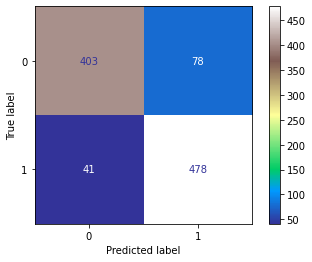

In [29]:
plot_confusion_matrix(gs, X_test, y_test, cmap='terrain');

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'TN = {tn}')
print(f'FP = {fp}')
print(f'FN = {fn}')
print(f'TP = {tp}')

TN = 403
FP = 78
FN = 41
TP = 478


In [31]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       481
           1       0.86      0.92      0.89       519

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



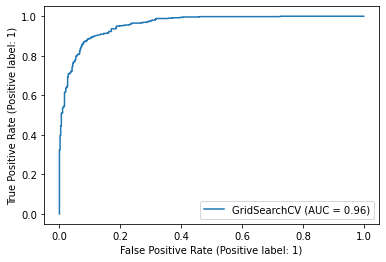

In [32]:
plot_roc_curve(gs, X_test, y_test);